In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu117'

# data prepation and 
# Imn Ml we have to perform 2 things
  1 Get Data into numerical representaion<p>
  2. Build a model to learn the pattern on that numerical representation

In [2]:
weight=0.7
bias=0.3

In [16]:
x=torch.arange(1,200,0.1).unsqueeze(dim=1)

In [17]:
x.shape,x.dtype


(torch.Size([1990, 1]), torch.float32)

In [18]:
(len(x)*4)/1024

7.7734375

In [19]:
import math

def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

In [20]:
x.dtype

torch.float32

In [21]:
convert_size(len(x)*4)

'7.77 KB'

In [22]:
y=weight*x+bias

In [23]:
y

tensor([[  1.0000],
        [  1.0700],
        [  1.1400],
        ...,
        [140.0900],
        [140.1600],
        [140.2300]])

In [24]:
len(x),len(y)

(1990, 1990)

In [25]:
# import pandas as pd 
# data=pd.DataFrame({'x':[i  for i in x]})
# data.to_csv("x_data2.csv",index=False)

In [26]:
#Training and testing data set
train_split=int(0.8*len(x))
train_split

1592

In [27]:
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

In [28]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1592, 398, 1592, 398)

In [29]:
#Building a function to visualize the data
def plot_prediction(train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test,predictions=None):
    plt.figure(figsize=(7,6))
    plt.scatter(train_data,train_label,c='b',s=4,label="training_data")
    plt.scatter(test_data,test_label,c='g',s=4,label="Testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",label="predictions")

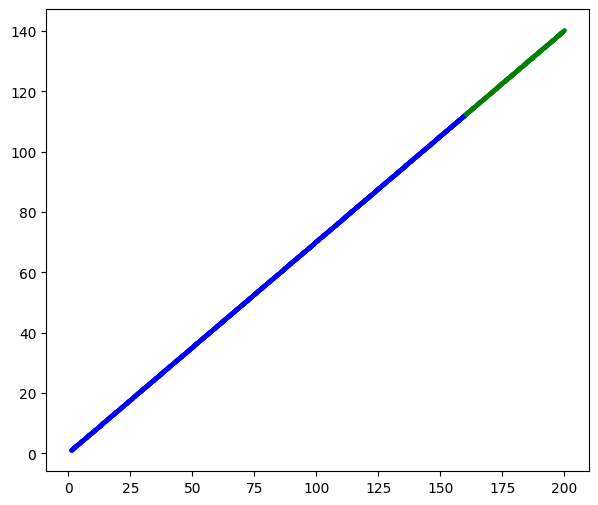

In [30]:
plot_prediction()

In [58]:
#Creating model for linear regression
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.b=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    def forward(self,x:torch.Tensor) ->torch.Tensor:
        return self.w*x+self.b

In [59]:
torch.manual_seed(43)
model_0=LinearRegression()

In [60]:
pred=model_0(x_test)

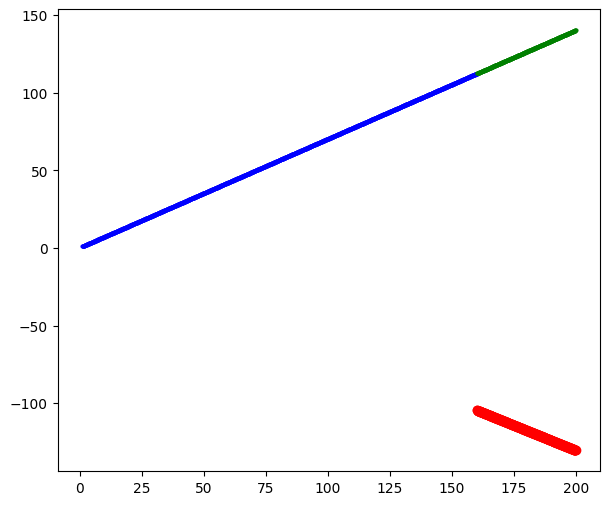

In [61]:
plot_prediction(predictions=pred.detach().numpy())

In [62]:
#Creating loss function
loss_fn=nn.L1Loss()
#setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.9)

In [63]:
model_0.state_dict()

OrderedDict([('w', tensor([-0.6484])), ('b', tensor([-0.7058]))])

In [64]:
weight,bias

(0.7, 0.3)

In [65]:
%%time
### making prediction using torch.inference_model()

with torch.inference_mode():
    y_pred=model_0(x_test)
y_pred[0]

CPU times: total: 0 ns
Wall time: 998 µs


tensor([-104.5797])

In [66]:
len(y_pred)

398

In [67]:
epochs=10
##Training
for epoch in range(epochs):
    model_0.train()
    #forward pass
    y_pred=model_0(x_train)
    #calculating the loss
    loss=loss_fn(y_pred,y_train)
    print("loss",loss)
    # optimizer zero grad
    optimizer.zero_grad()
    # backword on the loss wrt parameter
    loss.backward()
    #step to optimizer
    optimizer.step()

loss tensor(109.6195, grad_fn=<MeanBackward0>)
loss tensor(5730.7529, grad_fn=<MeanBackward0>)
loss tensor(109.6194, grad_fn=<MeanBackward0>)
loss tensor(5730.7529, grad_fn=<MeanBackward0>)
loss tensor(109.6194, grad_fn=<MeanBackward0>)
loss tensor(5730.7529, grad_fn=<MeanBackward0>)
loss tensor(109.6194, grad_fn=<MeanBackward0>)
loss tensor(5730.7529, grad_fn=<MeanBackward0>)
loss tensor(109.6194, grad_fn=<MeanBackward0>)
loss tensor(5730.7529, grad_fn=<MeanBackward0>)


In [68]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.adam(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.09) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

AttributeError: module 'torch.optim' has no attribute 'adam'

In [69]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 10 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 20 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 30 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 40 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 50 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 60 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 70 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 80 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 90 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 100 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 110 | MAE Train Loss: 109.6194076538086 | MAE Test Loss: 12809.8408203125 
Epoch: 120 | MAE Train Loss

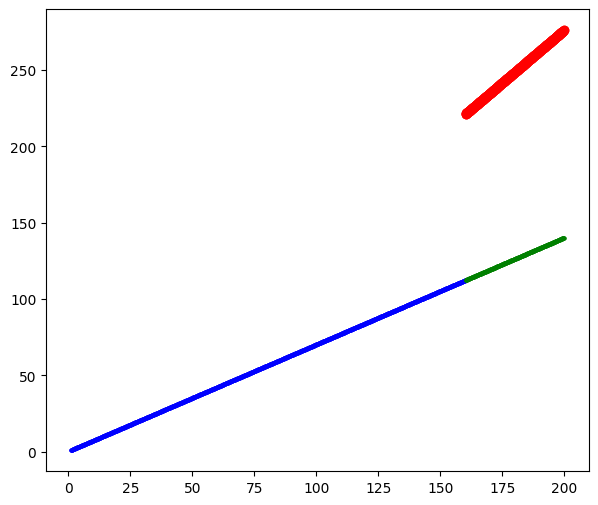

In [57]:
plot_prediction(predictions=model_0(x_test).detach().numpy())